# A Pseudoproxy Experiment with GraphEM and pseudoPAGES2k

**Expected time to run through: TBD mins**

This tutorial demonstrates how to get a reconstruction using GraphEM, leveraging a simple pseudoproxy dataset generated from iCESM gridded, with the realistic spatial availability but full temporal avaiablity of the PAGES 2k version 2 dataset.
The pseudoproxies are generated based on the original iCESM simulated surface temperature (`tas`) plus white noise with `SNR=10`.

In [1]:
%load_ext autoreload
%autoreload 2

import cfr
import os
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as  plt

## Data Preparation

In [4]:
# load a proxy database

job = cfr.ReconJob()
job.proxydb = pd.read_pickle('./data/pseudoPAGES2k/pseudo.tpn_SNR10.pkl')
job.proxydb.plotly()

In [5]:
# filter the database
# job.proxydb = job.proxydb.filter(by='loc-square', keys=(-20, 20, 150, 250))
# fig, ax = job.proxydb.plot()

In [6]:
job.proxydb = job.proxydb.center([1951, 1980])

Centering each of the ProxyRecord: 100%|██████████| 692/692 [00:00<00:00, 8728.12it/s]


In [7]:
# load observations
job.load_clim(
    tag='obs',
    path_dict={
        'tas': './data/tas_sfc_Amon_iCESM_past1000historical_085001-200512.nc',
    },
    anom_period=(1951, 1980),
    verbose=True,
)

>>> job.configs["obs_path"] = {'tas': './data/tas_sfc_Amon_iCESM_past1000historical_085001-200512.nc'}
>>> job.configs["obs_anom_period"] = (1951, 1980)
>>> job.configs["obs_lon_name"] = lon
>>> job.configs["obs_time_name"] = time
>>> obs variables ['tas'] loaded
>>> job.obs created


In [8]:
# regrid and crop obs to make the problem size smaller
# job.regrid_clim(tag='obs', nlat=42, nlon=63, verbose=True)
# job.crop_clim(tag='obs', lat_min=-20, lat_max=20, lon_min=150, lon_max=250, verbose=True)
job.regrid_clim(tag='obs', nlat=21, nlon=32, verbose=True)

>>> job.configs["prior_regrid_nlat"] = 21
>>> job.configs["prior_regrid_nlon"] = 32
>>> Processing tas ...


>>> job.configs["prior_annualize_months"] = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
>>> Processing tas ...
>>> job.obs updated


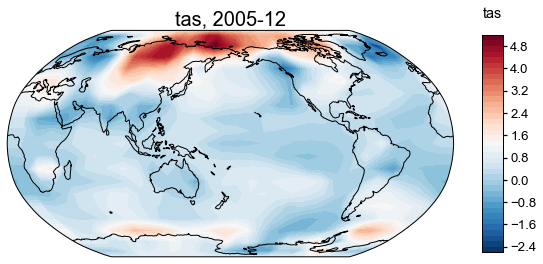

In [9]:
# annualize the observations
job.annualize_clim(tag='obs', verbose=True, months=list(range(1, 13)))
fig, ax = job.obs['tas'].plot(it=-1)

In [10]:
job.obs['tas'].da

<xarray.DataArray 'tas' (time: 1156, lat: 21, lon: 32)>
array([[[ 0.35099792,  0.32868441,  0.30275152, ...,  0.3425373 ,
          0.33976422,  0.35099792],
        [ 0.26919879,  0.91004639,  1.20283511, ...,  0.06520562,
          0.16645517,  0.26919879],
        [ 0.63232104,  0.54482825,  0.35060948, ..., -0.38006941,
          0.38551433,  0.63232104],
        ...,
        [-1.68549347, -0.34501307, -0.41636596, ...,  0.53030592,
         -1.48415656, -1.68549347],
        [-0.53159082, -0.13168321, -0.05006419, ..., -0.43647296,
         -0.70249819, -0.53159082],
        [-1.19067383, -1.19923319, -1.19362911, ..., -1.17709133,
         -1.18405516, -1.19067383]],

       [[ 0.11723455,  0.09404582,  0.06995277, ...,  0.10513572,
          0.10270761,  0.11723455],
        [ 0.00875702, -0.14493677, -0.1408075 , ...,  0.12693806,
          0.25129904,  0.00875702],
        [-0.01578903, -0.53897523, -0.76390615, ..., -0.37788572,
          0.03981445, -0.01578903],
...
        [-0.06493378, -0.21575858, -0.05364334, ..., -1.00831029,
         -1.81017373, -0.06493378],
        [-0.86924472, -0.99178962, -0.75154267, ..., -0.10418988,
         -0.576901  , -0.86924472],
        [ 0.02443186,  0.02621956,  0.023928  , ...,  0.05088548,
          0.03352951,  0.02443186]],

       [[ 0.85704931,  0.84119194,  0.85142464, ...,  0.83442676,
          0.83957598,  0.85704931],
        [-0.31464611,  0.01233311, -0.06268899, ..., -0.08347783,
         -0.25135057, -0.31464611],
        [ 0.90206718,  0.74039152,  0.85932342, ...,  1.49415634,
          1.10472862,  0.90206718],
        ...,
        [-0.43367004, -0.82801638, -0.84011964, ..., -1.10701091,
         -2.57267039, -0.43367004],
        [-1.08000395, -0.8340181 , -1.02608779, ...,  1.18349888,
         -0.24621176, -1.08000395],
        [ 1.69565455,  1.70603594,  1.69491224, ...,  1.72625917,
          1.70048966,  1.69565455]]])
Coordinates:
  * time     (time) object 0850-12-31 00:00:00 ... 2005-12-31 00:00:00
  * lon      (lon) float64 0.0 11.61 23.23 34.84 ... 325.2 336.8 348.4 360.0
  * lat      (lat) float64 -90.0 -81.0 -72.0 -63.0 -54.0 ... 63.0 72.0 81.0 90.0

In [11]:
job.prep_graphem(
    recon_period=(1000, 2000),
    calib_period=(1800, 2000),
    verbose=True)

>>> job.recon_time created
>>> job.calib_time created
>>> job.calib_idx created
>>> job.temp created
>>> job.df_proxy created
>>> job.proxy created
>>> job.lonlat created


In [18]:
job.temp

array([[       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       ...,
       [0.27229436, 0.26253222, 0.26396356, ..., 0.84922397, 0.86275827,
        0.87890752],
       [0.82766724, 0.81675207, 0.81847743, ..., 2.0972071 , 2.08124382,
        2.06393687],
       [0.96233622, 0.95522546, 0.95431268, ..., 1.03997848, 1.04911423,
        1.08248647]])

In [12]:
job.df_proxy

,NAm_153,Asi_245,NAm_165,Asi_178,Asi_174,Eur_016,Asi_198,NAm_145,Arc_070,Arc_071,...,Asi_119,Ocn_153,NAm_074,Asi_026,Ocn_169,Asi_201,Asi_179,Arc_014,Ocn_071,Ocn_072
1000.0,1.999147,1.192910,-0.125514,0.372308,0.137813,0.597692,0.459045,1.522973,1.156438,1.164271,...,0.802395,0.027671,2.008419,0.069651,0.332223,-0.580763,0.192548,1.311920,0.363546,0.363546
1001.0,-0.168715,0.810990,0.228043,-0.146447,-0.143963,-0.113615,0.466741,-1.356525,-1.478136,1.525961,...,1.025474,-0.348730,1.511555,0.152284,-0.332147,-0.306128,0.053384,1.649790,-0.395720,-0.395720
1002.0,-1.153973,-0.457728,-0.978941,-0.366344,-0.194634,0.013935,0.572059,0.197993,0.536586,-1.016801,...,-0.637886,-0.293169,-2.502832,0.201120,-0.315477,-0.407208,0.123507,-0.173945,-0.374382,-0.374382
1003.0,0.921477,0.621607,-0.139890,-0.672428,-0.266491,0.538005,-0.150871,1.433422,0.549265,-0.786880,...,0.327192,0.440870,1.146433,-0.201423,0.147798,-0.738826,-0.264360,-0.450302,0.223871,0.223871
1004.0,0.271755,-0.040619,0.706001,-0.191307,0.245341,-0.226820,0.821323,-0.592609,-1.229772,0.978412,...,0.177140,-0.066871,1.102663,0.286588,-0.152709,1.183818,0.417741,1.338506,-0.159114,-0.159114
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1996.0,0.452222,0.365013,-0.320482,-0.387422,0.107996,-0.275698,0.747630,2.247435,2.958836,-0.413822,...,0.012966,0.888607,-0.768083,0.115264,0.429088,0.322620,-0.165478,-1.016845,0.342945,0.342945
1997.0,0.630215,-0.228369,0.835595,-0.857627,-0.473008,0.123273,1.237087,0.083400,-0.290144,-0.976228,...,-0.297882,0.074774,-1.098804,-0.347305,-0.003518,0.560010,-0.818543,-1.162689,-0.219055,-0.219055
1998.0,0.447437,-0.172455,1.449216,0.635223,0.408153,0.116914,1.045716,0.441910,1.663871,2.238310,...,-0.409222,0.525448,0.126995,0.425778,0.066342,0.861453,0.311096,1.902128,0.015942,0.015942
1999.0,1.524068,-0.081420,0.090994,-0.039598,0.291274,-0.385411,-0.512012,2.168082,1.828074,-0.541443,...,0.350827,0.587975,0.632550,0.244840,0.429542,0.068283,-0.069404,-0.653921,0.454576,0.454576


In [13]:
print(np.shape(job.temp))
print(np.shape(job.proxy))
print(np.shape(job.lonlat))

(1001, 672)
(1001, 692)
(1364, 2)


## Graph estimation

In GraphEM, the selection of the covariance model used for inferring missing values is based on a [graph](http://ir.hit.edu.cn/~jguo/docs/notes/report-in-princeton-research.pdf). 
Two types of graphs are supported:
1. Neighborhood graphs
2. Empirical graphs (graphical lasso)


## 1. Neighborhood graph as initial guess

In [14]:
%%time
g = cfr.graphem.Graph(job.lonlat, job.temp, job.proxy)
g.calc_distance()

CPU times: user 12.3 s, sys: 22.8 ms, total: 12.4 s
Wall time: 12.4 s


(<Figure size 288x288 with 1 Axes>,
 <GeoAxesSubplot:title={'center':'Neighbors of the target proxy (r=3000 km)'}>)

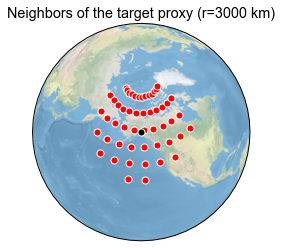

In [15]:
g.calc_adj(distance=3000)
g.plot_neighbors(10)

In [16]:
job.run_graphem?

Signature: job.run_graphem(save_path, verbose=False, **fit_kws)
Docstring:
Run the GraphEM solver, essentially the :py:meth: `GraphEM.solver.GraphEM.fit` method

Note that the arguments for :py:meth: `GraphEM.solver.GraphEM.fit` can be appended in the
argument list of this function directly. For instance, to pass a pre-calculated graph, use
`estimate_graph=False` and `graph=g.adj`, where `g` is the :py:`Graph` object.

Args:
    save_path (str): the path to save the fitting result
    verbose (bool, optional): print verbose information. Defaults to False.
    fit_kws (dict): the arguments for :py:meth: `GraphEM.solver.GraphEM.fit`

See also:
    cfr.graphem.solver.GraphEM.fit : fitting the GraphEM method
File:      ~/Github/cfr/cfr/reconjob.py
Type:      method


In [21]:
%%time

# need to remove G.pkl if the previous run is problematic
save_path = './results/graphem-ppe-pages2k/G.pkl'
job.run_graphem(save_path=save_path, verbose=True, distance=5e3)

Estimating graph using neighborhood method
Running GraphEM:

Iter     dXmis     rdXmis



LinAlgError: Singular matrix

In [26]:
job.G.graph

array([[1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 1]])

## Validation

In [15]:
mask = (job.obs['tas'].time >= 1000) & (job.obs['tas'].time <= 2000)
target = job.obs['tas'].value[mask]
print(np.shape(target))

(1001, 22, 33)


### Mean Statistics

In [16]:
nt = np.size(ds['year'])
temp_r = job.recon.reshape((nt, -1))
V = cfr.graphem.solver.verif_stats(temp_r, target.reshape((nt, -1)), job.calib_idx)
print(V)

Mean MSE = 0.5291, Mean RE = 0.1882, Mean CE = -0.0223, Mean R2 = 0.3907


### Map of CE

In [17]:
ce = cfr.utils.coefficient_efficiency(target, ds['recon'])
print(np.shape(ce))

(22, 33)


/Users/fzhu/Apps/miniconda3/envs/LMRt/lib/python3.8/site-packages/cartopy/mpl/geoaxes.py:834: UserWarning: Attempting to set identical left == right == -180.0 results in singular transformations; automatically expanding.
  self.set_xlim([x1, x2])


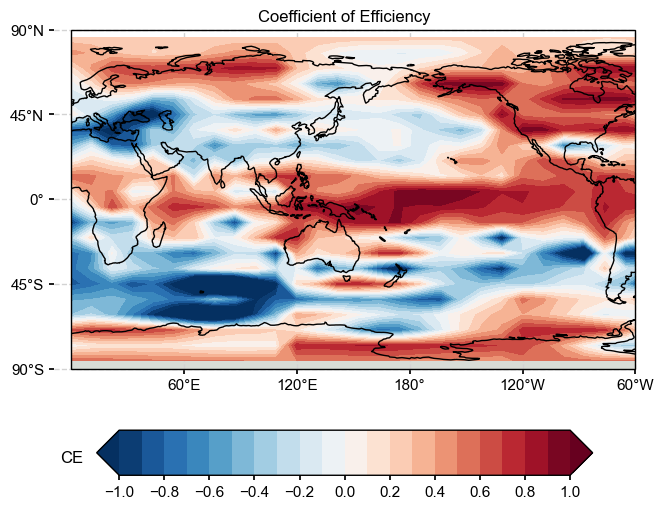

In [18]:
import seaborn as sns
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter

fig = plt.figure(figsize=[8, 8])
ax = plt.subplot(projection=ccrs.PlateCarree(central_longitude=180))
ax.set_title('Coefficient of Efficiency')
latlon_range = [0, 360, -90, 90]
transform=ccrs.PlateCarree()

ax.set_extent(latlon_range, crs=transform)
lon_formatter = LongitudeFormatter(zero_direction_label=False)
lat_formatter = LatitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)

lon_ticks=[60, 120, 180, 240, 300]
lat_ticks=[-90, -45, 0, 45, 90]
lon_ticks = np.array(lon_ticks)
lat_ticks = np.array(lat_ticks)
lon_min, lon_max, lat_min, lat_max = latlon_range
mask_lon = (lon_ticks >= lon_min) & (lon_ticks <= lon_max)
mask_lat = (lat_ticks >= lat_min) & (lat_ticks <= lat_max)
ax.set_xticks(lon_ticks[mask_lon], crs=ccrs.PlateCarree())
ax.set_yticks(lat_ticks[mask_lat], crs=ccrs.PlateCarree())

levels = np.linspace(-1, 1, 21)
cbar_labels = np.linspace(-1, 1, 11)
cbar_title = 'CE'
extend = 'both'
cmap = 'RdBu_r'
cbar_pad=0.1
cbar_orientation='horizontal'
cbar_aspect=10
cbar_fraction=0.35
cbar_shrink=0.8
font_scale=1.5
land_color=sns.xkcd_rgb['light grey']
ocean_color=sns.xkcd_rgb['white']
        
ax.add_feature(cfeature.LAND, facecolor=land_color, edgecolor=land_color)
ax.add_feature(cfeature.OCEAN, facecolor=ocean_color, edgecolor=ocean_color)
ax.coastlines()
im = ax.contourf(ds['lon'].values, ds['lat'].values, ce, levels, transform=transform, cmap=cmap, extend=extend)
cbar = fig.colorbar(
    im, ax=ax, orientation=cbar_orientation, pad=cbar_pad, aspect=cbar_aspect,
    fraction=cbar_fraction, shrink=cbar_shrink)
cbar.set_ticks(cbar_labels)
cbar.ax.set_title(cbar_title, x=-0.05, y=0.1)

### Mean timeseries

In [19]:
import pyleoclim as pyleo

In [20]:
def geo_mean(field, lat):
    m = np.average(
        np.average(field, axis=-1), axis=-1, weights=np.cos(np.deg2rad(lat))
    )
    return m

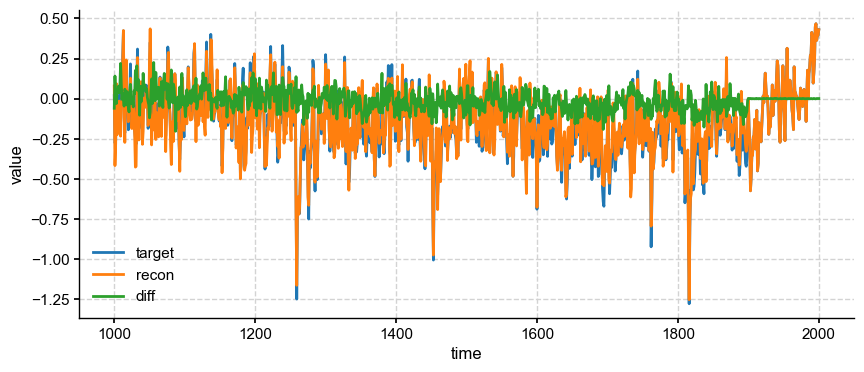

In [21]:
m_target = geo_mean(target, job.obs.fields['tas'].lat) 
ts_target = pyleo.Series(time=np.arange(1000, 2001), value=m_target)

m_recon = geo_mean(ds['recon'].values, ds['lat'].values)
ts_recon = pyleo.Series(time=ds['year'].values, value=m_recon)

fig, ax = ts_target.plot(mute=True, label='target')
ts_recon.plot(ax=ax, label='recon')
ax.plot(ds['year'].values, m_target-m_recon, label='diff')
ax.legend()
pyleo.showfig(fig)